In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b #矩阵乘法y = Xw + b整个样本
    y += torch.normal(0, 0.01, y.shape) #列向量，行数由网络自行推断

    return X, y.reshape((-1, 1))

In [3]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
f'feature:{features[0]}', f'label:{labels[0]}'

('feature:tensor([ 0.1054, -2.0085])', 'label:tensor([11.2338])')

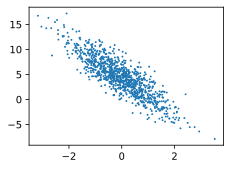

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]
        )
        yield features[batch_indices], labels[batch_indices]

In [7]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.3961,  0.2061],
        [-0.2236,  1.5915],
        [-2.1521, -0.2844],
        [ 1.2614,  0.4780],
        [-0.7226, -0.2359],
        [-0.0339,  1.6986],
        [-0.5193,  1.4933],
        [-0.2176, -0.0341],
        [ 0.7242,  0.5949],
        [-2.1825, -1.2231]]) 
 tensor([[ 2.7176],
        [-1.6508],
        [ 0.8591],
        [ 5.0896],
        [ 3.5593],
        [-1.6342],
        [-1.9207],
        [ 3.8825],
        [ 3.6083],
        [ 3.9846]])


In [8]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
#初始化参数

In [9]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [10]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad(): #不计算梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_() #清空梯度

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.029806
epoch 2, loss 0.000103
epoch 3, loss 0.000049


In [13]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-8.5950e-04, -6.4135e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([8.2493e-05], grad_fn=<RsubBackward1>)
